In [3]:
%load_ext autoreload
%autoreload 2
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # from chapter_2 -> project root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [4]:
from perceptron import Perceptron
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
iris_dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(iris_dataset_url, header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# load first 100 samples
df = df.iloc[:100]
y = np.where(df.iloc[:, -1].values == "Iris-setosa", 0, 1)
X = df.iloc[:100, [0, 2]].values

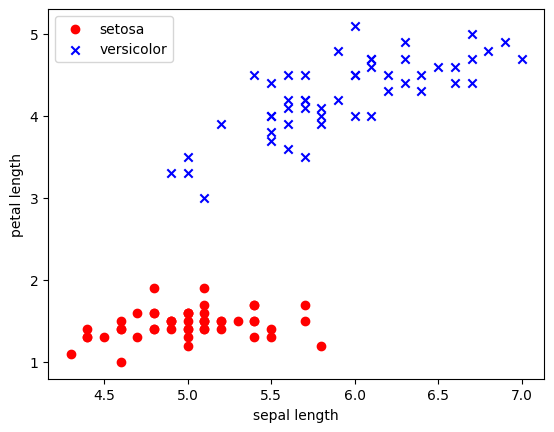

In [7]:
from visualization.visualization import plot_data

plot_data(X)
plt.show()


# PERCEPTRON

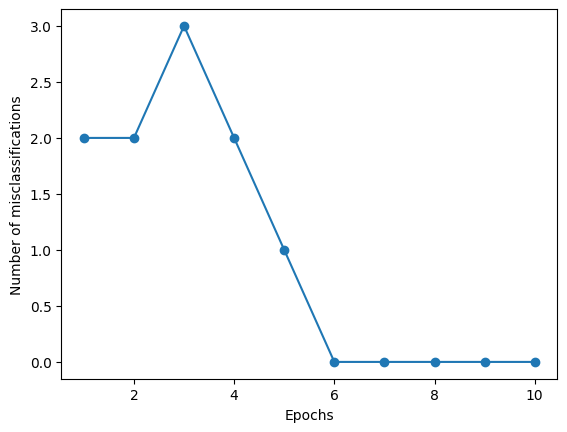

In [8]:
p = Perceptron(learning_rate=0.1, n_iterations=10, random_state=1)
p.fit(X, y)
plt.plot(range(1, len(p.errors) + 1), p.errors, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")
plt.show()


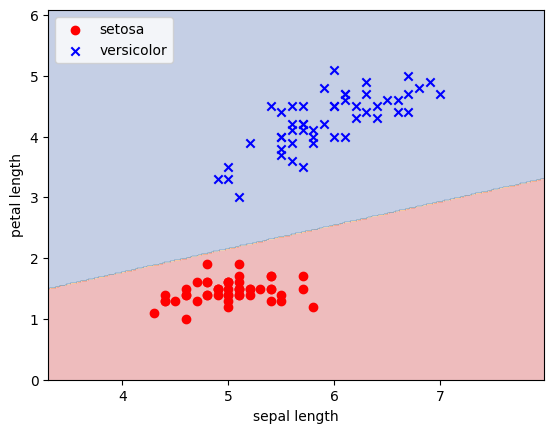

In [11]:
from visualization.visualization import plot_decision_regions
    
plot_decision_regions(X, y, classifier=p)
plot_data(X)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()


# ADALINE

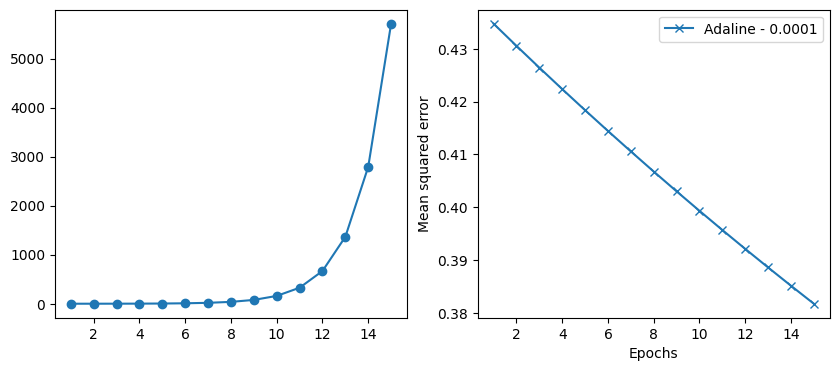

In [12]:
from adaline import Adaline
adaline_high_eta = Adaline(learning_rate=0.03, n_iterations=15, random_state=1)
adaline_low_eta = Adaline(learning_rate=0.0001, n_iterations=15, random_state=1)

adaline_high_eta.fit(X, y)
adaline_low_eta.fit(X, y)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(range(1, len(adaline_high_eta.losses) + 1), adaline_high_eta.losses, marker="o", label="Adaline - 0.1")
ax[1].plot(range(1, len(adaline_low_eta.losses) + 1), adaline_low_eta.losses, marker="x", label="Adaline - 0.0001")
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")
plt.legend(loc="upper right")
plt.show()

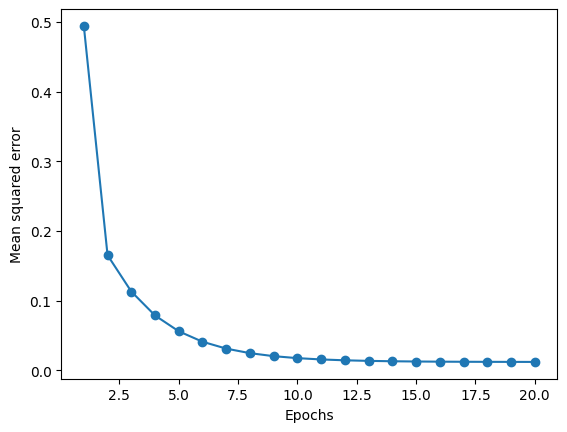

In [13]:
standarized_X = np.copy(X)
standarized_X[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
standarized_X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

adaline_standarized = Adaline(learning_rate=0.5, n_iterations=20, random_state=1)
adaline_standarized.fit(standarized_X, y)

plt.plot(range(1, len(adaline_standarized.losses) + 1), adaline_standarized.losses, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")
plt.show()



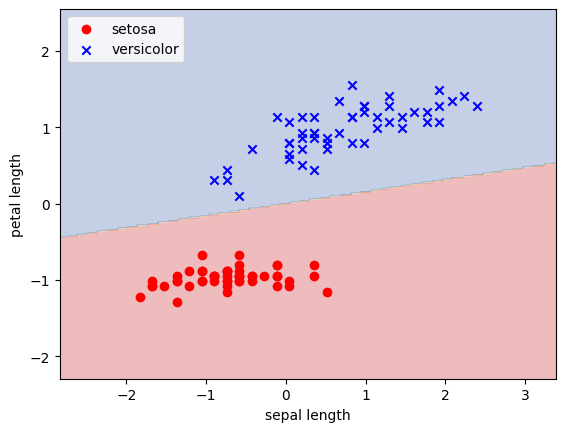

In [14]:
plot_decision_regions(standarized_X, y, classifier=adaline_standarized)
plot_data(standarized_X)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")

plt.show()

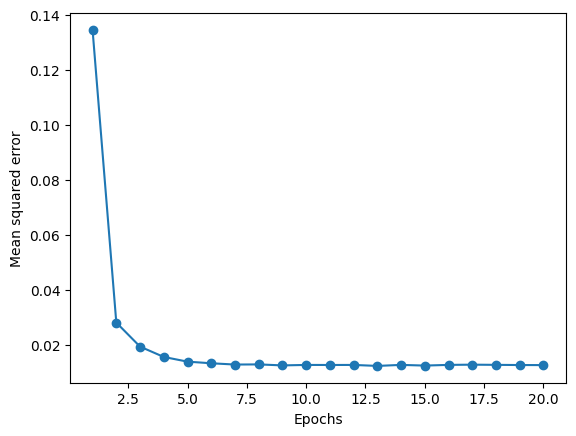

In [15]:
from adaline import AdalineSGD

adaline_standarized_sgd = AdalineSGD(learning_rate=0.01, n_iterations=20, random_state=1)
adaline_standarized_sgd .fit(standarized_X, y)

plt.plot(range(1, len(adaline_standarized_sgd .losses) + 1), adaline_standarized_sgd .losses, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")
plt.show()

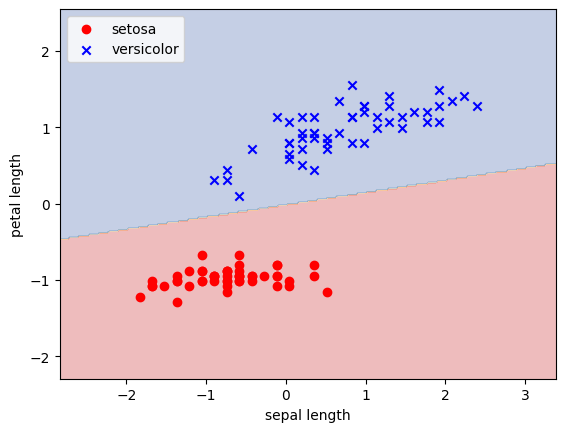

In [16]:
plot_decision_regions(standarized_X, y, classifier=adaline_standarized_sgd)
plot_data(standarized_X)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")

plt.show()